In [1]:
import cv2
from matplotlib import pyplot as plt

from ocrpipeline.predictor import PipelinePredictor
from ocrpipeline.utils import get_image_visualization, get_line_number_visualization
from ocrpipeline.linefinder import get_structured_text

In [2]:
IMG_PATH = '0_0.jpg'

PIPELINE_CONFIG_PATH = 'pipeline_config.json'

In [3]:
predictor = PipelinePredictor(pipeline_config_path=PIPELINE_CONFIG_PATH)

Loading the LM will be faster if you build a binary file.
Reading ocr/corpus_o6.arpa
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
****************************************************************************************************


In [4]:
image = cv2.imread(IMG_PATH)

rotated_image, pred_data = predictor(image)

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


## Visualize input image

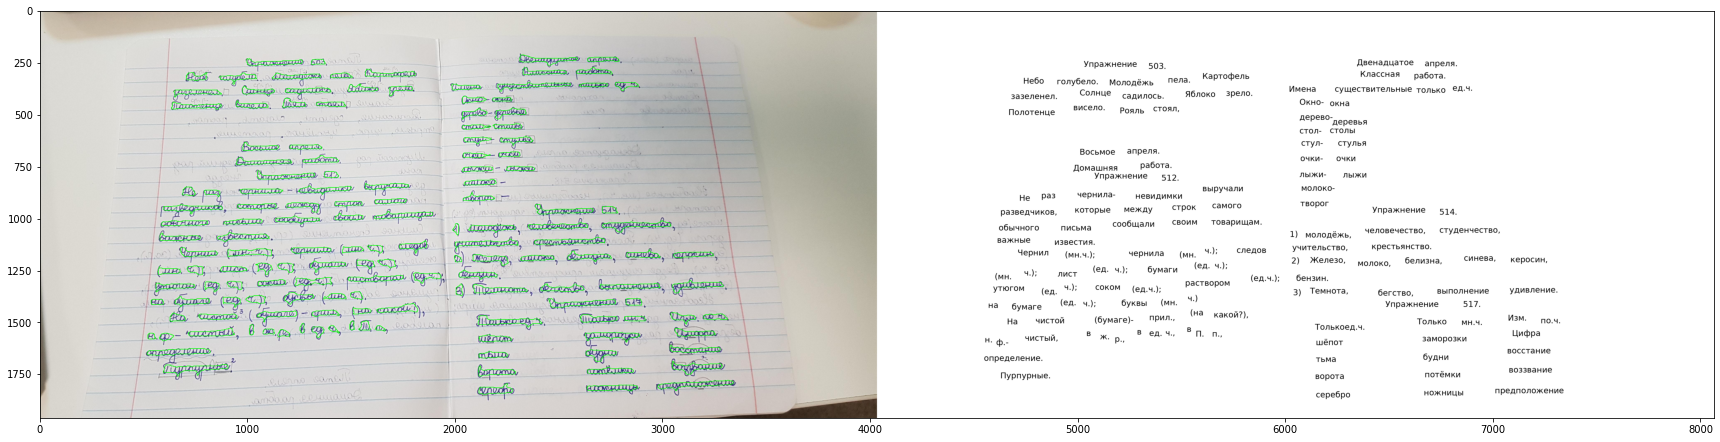

In [5]:
image = cv2.imread(IMG_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

vis = get_image_visualization(
    img=image,
    pred_data=pred_data,
    draw_contours_classes=['shrinked_pupil_text'],
    draw_text_classes=['shrinked_pupil_text']
)

plt.figure(figsize=(30, 30))
plt.imshow(vis)
plt.show()

## Get structured text from prediction

In [6]:
structured_text = get_structured_text(pred_data, ['shrinked_pupil_text'])
for page_text in structured_text:
    for line_text in page_text:
        if line_text:
            print(' '.join(line_text))
    print('\n')

Упражнение 503.
Небо голубело. Молодёжь пела. Картофель
зазеленел. Солнце садилось. Яблоко зрело.
Полотенце висело. Рояль стоял,
Восьмое апреля.
Домашняя работа.
Упражнение 512.
Не раз чернила- невидимки выручали
разведчиков, которые между строк самого
обычного письма сообщали своим товарищам.
важные известия.
Чернил (мн.ч.); чернила (мн. ч.); следов
(мн. ч.); лист (ед. ч.); бумаги (ед. ч.);
утюгом (ед. ч.); соком (ед.ч.); раствором (ед.ч.);
на бумаге (ед. ч.); буквы (мн. ч.)
На чистой (бумаге)- прил., (на какой?),
н. ф.- чистый, в ж. р., в ед. ч., в П. п.,
определение.
Пурпурные.


Двенадцатое апреля.
Классная работа.
Имена существительные только ед.ч.
Окно- окна
дерево- деревья
стол- столы
стул- стулья
очки- очки
лыжи- лыжи
молоко-
творог
Упражнение 514.
1) молодёжь, человечество, студенчество,
учительство, крестьянство.
2) Железо, молоко, белизна, синева, керосин,
бензин.
3) Темнота, бегство, выполнение удивление.
Упражнение 517.
Изм. по.ч.
Толькоед.ч. Только мн.ч.
шёпот заморозки Ц